# 02805 Assignment 1
## Part One: Network Models
### Watts-Strogatz Networks
* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. 

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [73]:
N, k_e, p = 500, 4, [0, 0.1, 1]
G1 = nx.watts_strogatz_graph(N, k_e, p[0])
G2 = nx.watts_strogatz_graph(N, k_e, p[1])
G3 = nx.watts_strogatz_graph(N, k_e, p[2])

* Calculate the average shortest path length $\langle d \rangle$ for each one. 

In [4]:
dist1 = nx.average_shortest_path_length(G1)
dist2 = nx.average_shortest_path_length(G2)
dist3 = nx.average_shortest_path_length(G3)
print("Average shortest path (G1):", dist1)
print("Average shortest path (G2):", dist2)
print("Average shortest path (G3):", dist3) 

print("<d> =", np.log(N) / np.log(k_e))

Average shortest path (G1): 62.875751503006015
Average shortest path (G2): 7.346332665330661
Average shortest path (G3): 4.756440881763527
<d> = 4.4828921423310435


* Describe what happens to the network when $p = 1$.

*This is best described by plotting the network graphs. As can be seen from the three graphs below, the last graph with $p=1$ has every node connected to 4 other nodes and therefore has the lowest average distance between nodes out of the 3 networks.* 

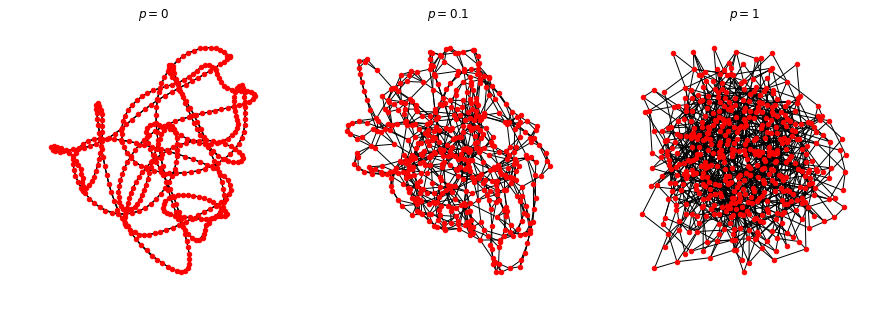

In [72]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.title("$p = 0$")
nx.draw(G1, node_size=20)

plt.subplot(1,3,2)
plt.title("$p = 0.1$")
nx.draw(G2, node_size=20)

plt.subplot(1,3,3)
plt.title("$p = 1$")
nx.draw(G3, node_size=20)

plt.show()

* Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [5]:
def average_distances(p_values, m):
    n = len(p_values)
    d_avgs = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            G = nx.watts_strogatz_graph(500, 4, p_values[i])
            d_avgs[i,j] = nx.average_shortest_path_length(G)
    return d_avgs

In [9]:
P = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
M = 50

In [10]:
d_avgs = average_distances(P, M)

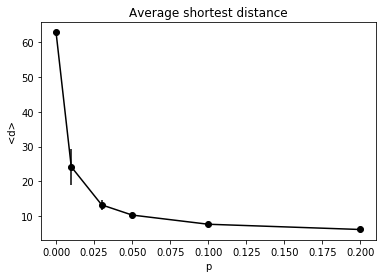

In [11]:
d_mean = np.mean(d_avgs, axis=1)
d_std = np.std(d_avgs, axis=1)

plt.errorbar(P, d_mean, yerr=d_std, fmt='-o', color="black")
plt.title("Average shortest distance")
plt.xlabel("p")
plt.ylabel("<d>")
plt.show()

## 2. The Barabasi-Albert Model
* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [91]:
import random

def degree_array(G, direction="none"):
    if direction == "in":
        return list(G.in_degree().values())
    elif direction == "out":
        return list(G.out_degree().values())
    else:
        return list(G.degree().values())

def flatten_edgelist(G):
    return list(sum(G.edges(), ()))

def BA_graph(N):
    # Create initial two nodes, with one link between them
    G = nx.Graph()
    G.add_edges_from([(0,1)])
    
    # Create the remaining N-2 nodes. Link based on degree
    for node in range(2, N):
        edges = flatten_edgelist(G)
        pick = random.choice(edges)
        G.add_edges_from([(node, pick)])
    
    return G

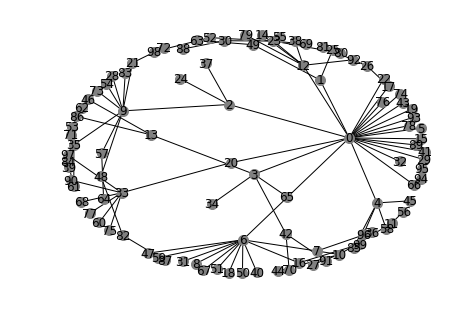

In [8]:
ba_graph_100 = BA_graph(100)
nx.draw(ba_graph_100, with_labels=True, node_color="gray", node_size=100)
plt.show()

* Now create a 5000 node network.

In [53]:
ba_graph_5k = BA_graph(5000)

* What's the maximum and minimum degree? 

In [54]:
degrees_5k = degree_array(ba_graph_5k)

In [55]:
print("maximum =", np.max(degrees_5k))
print("minimum =", np.min(degrees_5k))

maximum = 129
minimum = 1


* Now, bin the degree distribution, for example using numpy.histogram. Plot the distribution. Plot it with both linear and log-log axes.

In [98]:
def hist_to_scatter(degrees):
    v = range(min(degrees), max(degrees)+1)
    hist = np.histogram(degrees, bins=v)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    return freqs, means

def plot_degree_distribution(degrees):
    freqs, means = hist_to_scatter(degrees)
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Degree distribution")
    plt.show()
    
    plt.loglog(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Log-Log plot of the Degree distribution")
    plt.show()

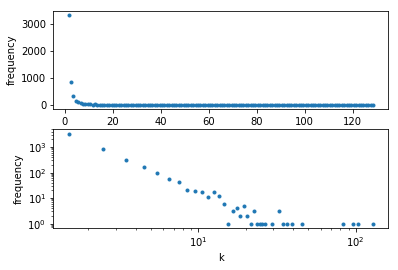

In [57]:
plot_degree_distribution(degrees_5k)

** 3. Power-laws and the friendship paradox**
* Pick a node i at random (e.g. use random.choice). Find its degree.

In [ ]:
nodes = ba_graph_5k.nodes()
node = random.choice(nodes)
print("degree =", ba_graph_5k.degree(node))

* Find i's neighbors. And calculate their average degree.

In [ ]:
def neighbors_avg_degree(G, node):
    nb = ba_graph_5k.neighbors(node)
    degrees = np.array(list(G.degree(nb).values()))
    return np.mean(degrees)

In [ ]:
k_avg_neighbors = neighbors_avg_degree(ba_graph_5k, node)

* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.


In [ ]:
print("degree =", ba_graph_5k.degree(node))
print("AVG degree of neighbors:", k_avg_neighbors)

* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?


In [ ]:
N = 0 # Number of times neighbors have more friends on avg
for _ in range(1000):
    node = random.choice(nodes)
    k_node = ba_graph_5k.degree(node)
    k_avg_neighbors = neighbors_avg_degree(ba_graph_5k, node)
    if k_node < k_avg_neighbors:
        N += 1
        
print("Friendship paradox holds:", N, "/ 1000 times")

***Part Two: The network of American politics***

**4. Basic stats for pages over time**
* By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. 

In [2]:
import pandas as pd

In [74]:
url_base = 'https://raw.githubusercontent.com/suneman/socialgraphs2018/master/files/data_US_congress/'
df = pd.read_csv(url_base + 'H113.csv')
df['congress_number'] = 113

df_1 = pd.read_csv(url_base + 'H114.csv')
df_1['congress_number'] = 114

df_2 = pd.read_csv(url_base + 'H115.csv')
df_2['congress_number'] = 115

In [75]:
all_members = pd.concat([df, df_1, df_2]).reset_index(drop=True)

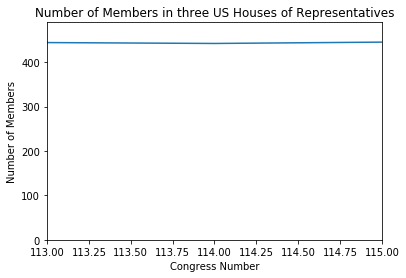

congress_number
113    444
114    442
115    445
dtype: int64


In [81]:
counts = all_members.groupby('congress_number').size()
counts.plot('line')
plt.xlabel('Congress Number')
plt.ylabel('Number of Members')
plt.title('Number of Members in three US Houses of Representatives')
plt.ylim(ymin=0, ymax=counts.max() * 1.1)
plt.show()

print(counts)

* Is this development over time what you would expect? Why? Explain in your own words.

*The US congress is capped at 435 representatives ([source](https://www.govtrack.us/congress/members)), so it is actually surprising that the actualy numbers are above 440, but unsurprising that the numbers are somewhat steady.*

* How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.

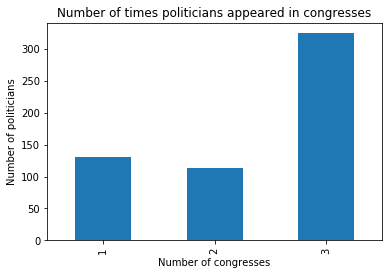

In [58]:
groups = all_members.groupby("WikiPageName")
times_in_congress = groups.size().sort_values()
times_in_congress_count = times_in_congress.groupby(times_in_congress).size()
times_in_congress_count.plot("bar")
plt.title("Number of times politicians appeared in congresses")
plt.xlabel("Number of congresses")
plt.ylabel("Number of politicians")
plt.show()

* Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.

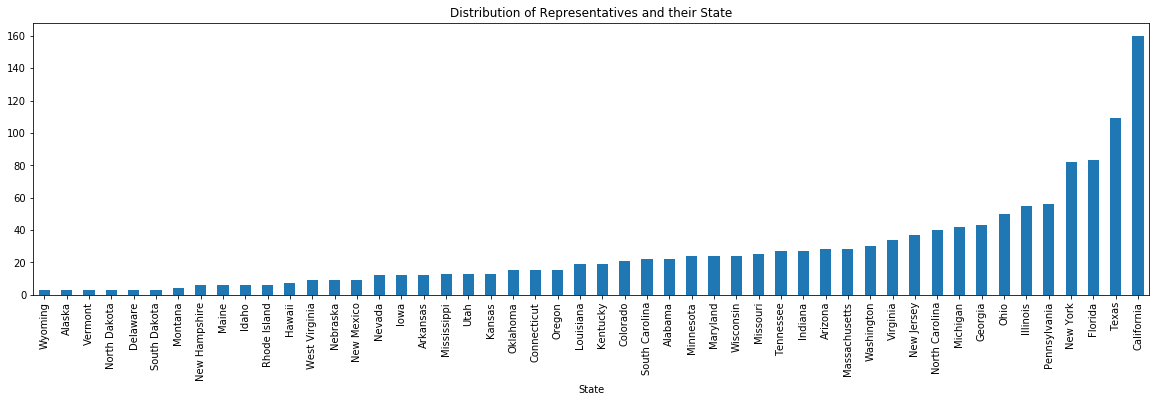

In [59]:
states = all_members.groupby("State")
states_representation = states.size().sort_values()
plt.figure(figsize=[20,5])
states_representation.plot("bar")
plt.title("Distribution of Representatives and their State")
plt.show()

* How has the party composition of the house of representative changed over time? Plot your results.


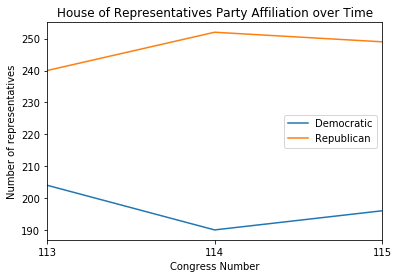

In [62]:
parties = all_members.groupby(["congress_number", "Party"])
parties_count = parties.size()
parties_count.groupby("Party").plot()
plt.legend()
plt.xticks(np.arange(3), [113, 114, 115])
plt.xlabel('Congress Number')
plt.ylabel('Number of representatives')
plt.title('House of Representatives Party Affiliation over Time')
plt.show()

**5. Basic stats for the network**
* Create simple network statistics for the 113th house of representatives.

In [84]:
import re
import io

def get_article_links(name, year):
    # The regex pattern for recognizing links on the form [x | y]
    # and only capturing 'x'.
    article_pattern = r'\[\[([^\]]*?)(?:\|.*?)*\]\]'
    path_folder = './WikiPages/'
    article = io.open(path_folder + name + year + ".txt", 'r', encoding='utf-8').read()
    article_links = re.findall(article_pattern, article)
    article_links = [a.replace(' ', '_') for a in article_links]
    return article_links

In [85]:
wiki_page_names = list(df.WikiPageName)

In [86]:
congress_graph = nx.DiGraph()

for i,name in enumerate(wiki_page_names):
    article_links = get_article_links(name, "2015")
    congress_graph.add_node(name)
    for link in article_links:
        if link in wiki_page_names:
            congress_graph.add_edge(name, link)

* What is the number of nodes in the network? And the number of links?

* What is the number of nodes in the network? And the number of links

In [88]:
print('The number of nodes: %d' % len(congress_graph.nodes()))
print('The number of links: %d' % len(congress_graph.edges()))

The number of nodes: 444
The number of links: 1606


* Plot the in and out-degree distributions.

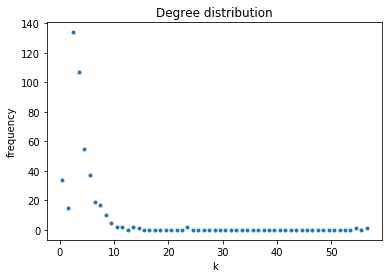

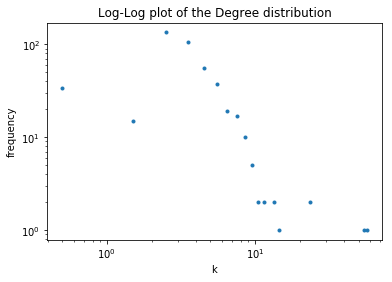

In [99]:
in_degrees = degree_array(congress_graph, direction="in")
plot_degree_distribution(in_degrees)

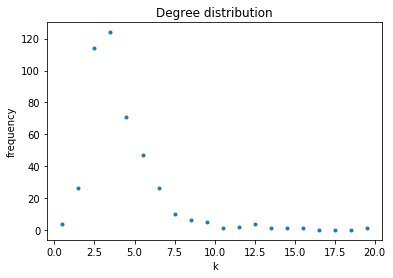

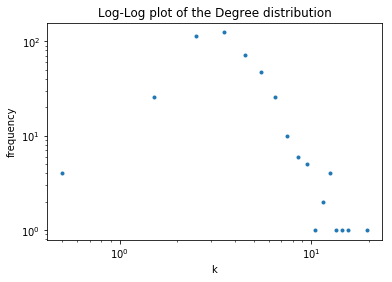

In [100]:
out_degrees = degree_array(congress_graph, direction="out")
plot_degree_distribution(out_degrees)

* Who is the most connected representative?

In [52]:
d = congress_graph.degree()

# Sort by degree, most connected is last element, at index -1
most_connected_politician = sorted(d, key=d.get)[-1]

print('Most Connected node:', most_connected_politician)
print('Outgoing:', len(congress_graph.out_edges(most_connected_politician)))
print('Incoming:', len(congress_graph.in_edges(most_connected_politician))) 

Most Connected node: Nancy_Pelosi
Outgoing: 11
Incoming: 57


We conclude that [Nancy Pelosi](https://en.wikipedia.org/wiki/Nancy_Pelosi) is the most connected representative.